# Experiment 2

 - Training data - Before 2011
 - Testing data - After 2011

In [27]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import xgboost as xgb
import warnings 


warnings.filterwarnings("ignore")

%matplotlib inline

In [28]:
data = pd.read_csv('D:/research-assistant/datasets/final.csv')
data.sort_values("year", axis = 0, ascending = True, inplace = True, na_position ='last') 
data.head()

,Unnamed: 0,cik,year,size,ni,zscore,leverage,prloss,chgdt,cfo,...,litigate,reportlag,priorgc,newequity,newdebt,dependence,indexpert,tenure,big4,bankruptcy
0,39,1923,1999,4.633233,-0.457,-1.379207,0.782724,1,0.0,0.068627,...,0,88,0,0.029568,0.0,0.0,0,0.693147,1,False
266,62222,948070,1999,1.291709,0.074,-4.436830,0.296785,1,0.0,-0.017862,...,0,123,0,0.825776,0.0,0.0,0,0.693147,0,False
265,62215,948069,1999,4.775310,10.629,-4.376339,0.250027,1,0.0,-0.065780,...,0,92,0,0.088910,0.0,0.0,0,0.693147,1,False
264,61608,945446,1999,3.250994,-12.713,-2.122433,0.419352,1,0.0,-0.338124,...,0,65,0,0.000000,0.0,0.0,0,0.693147,1,False
263,61600,945439,1999,-0.404965,-1.153,3.463117,0.977511,1,0.0,-0.526237,...,0,92,0,10.487256,0.0,0.0,0,0.693147,0,False


In [29]:
data.year.value_counts()

2000    2998
2002     479
2001     422
1999     392
2013     310
2014     232
2017     226
2003     223
2012     221
2005     220
2016     216
2009     197
2008     194
2006     189
2015     187
2004     183
2007     179
2010     178
2011     162
2018      74
Name: year, dtype: int64

In [30]:
main_data = pd.get_dummies(data, columns=['year'])
main_data['year'] =  data['year']
main_data.shape

(7482, 42)

In [31]:
main_shape = main_data.shape[1] - 1
X = main_data.iloc[:,range(0,main_shape)]
Y = main_data.iloc[:,main_shape]
train = pd.DataFrame()
test = pd.DataFrame()
for i in tqdm(range(main_data.shape[0])):
    year = int(main_data.year[i])
    if(year < 2011):
        train  = train.append(main_data.iloc[i])
    else:
        test = test.append(main_data.iloc[i])


100%|██████████████████████████████████████████████████████████████████████████████| 7482/7482 [01:32<00:00, 81.08it/s]


In [32]:
X= X.drop(columns = ['Unnamed: 0','cik', 'bankruptcy'])

In [33]:
train = train[['Unnamed: 0', 'cik', 'size', 'ni', 'zscore', 'leverage', 'prloss',
       'chgdt', 'cfo', 'liquidity', 'mkbk', 'litigate', 'reportlag', 'priorgc',
       'newequity', 'newdebt', 'dependence', 'indexpert', 'tenure', 'big4',
       'year_1999', 'year_2000', 'year_2001', 'year_2002',
       'year_2003', 'year_2004', 'year_2005', 'year_2006', 'year_2007',
       'year_2008', 'year_2009', 'year_2010', 'year_2011', 'year_2012',
       'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017',
       'year_2018', 'year','bankruptcy']]

test = test[['Unnamed: 0', 'cik', 'size', 'ni', 'zscore', 'leverage', 'prloss',
       'chgdt', 'cfo', 'liquidity', 'mkbk', 'litigate', 'reportlag', 'priorgc',
       'newequity', 'newdebt', 'dependence', 'indexpert', 'tenure', 'big4',
       'year_1999', 'year_2000', 'year_2001', 'year_2002',
       'year_2003', 'year_2004', 'year_2005', 'year_2006', 'year_2007',
       'year_2008', 'year_2009', 'year_2010', 'year_2011', 'year_2012',
       'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017',
       'year_2018', 'year','bankruptcy']]

In [34]:
train.bankruptcy.sum()

615.0

In [35]:
test.bankruptcy.sum()

200.0

In [36]:

train = train.drop(columns = ['Unnamed: 0','cik', "year"])
test = test.drop(columns = ['Unnamed: 0','cik', "year"])
shape = train.shape[1] - 1

# Normalizing the data
#sc = StandardScaler()
#train.iloc[:,range(0,shape)] = sc.fit_transform(train.iloc[:,range(0,shape)])
#test.iloc[:,range(0,shape)] = sc.fit_transform(test.iloc[:,range(0,shape)])


# splitting the dataset
x_train = train.drop(columns = ['bankruptcy'])
y_train = train['bankruptcy']
x_test = test.drop(columns = ['bankruptcy'])
y_test = test['bankruptcy']
#print(x_train.head())

#Testing dataset
x_test = pd.DataFrame(x_test)
y_test = pd.DataFrame(y_test)


#Training dataset
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)


In [37]:
x_train

,size,ni,zscore,leverage,prloss,chgdt,cfo,liquidity,mkbk,litigate,...,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018
0,4.633233,-0.457,-1.379207,0.782724,1.0,0.0,0.068627,0.070678,0.492706,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
266,1.291709,0.074,-4.436830,0.296785,1.0,0.0,-0.017862,0.304754,0.697538,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
265,4.775310,10.629,-4.376339,0.250027,1.0,0.0,-0.065780,0.062144,1.418108,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
264,3.250994,-12.713,-2.122433,0.419352,1.0,0.0,-0.338124,0.667958,2.641014,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
263,-0.404965,-1.153,3.463117,0.977511,1.0,0.0,-0.526237,0.013493,65.286667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5721,2.407395,-11.289,3.334303,0.820351,1.0,0.0,-0.917335,0.414948,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5735,3.713011,-12.013,-3.018140,0.975035,1.0,0.0,-0.025600,0.400469,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5734,2.953294,-3.065,-0.629508,0.703845,1.0,0.0,0.014659,0.270384,14.200986,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5733,3.726344,-4.099,-3.905665,0.052448,1.0,0.0,-0.058781,0.166928,6.151572,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
y_train

,bankruptcy
0,0.0
266,0.0
265,0.0
264,0.0
263,0.0
...,...
5721,0.0
5735,0.0
5734,0.0
5733,0.0


1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1428
         1.0       1.00      1.00      1.00       200

    accuracy                           1.00      1628
   macro avg       1.00      1.00      1.00      1628
weighted avg       1.00      1.00      1.00      1628



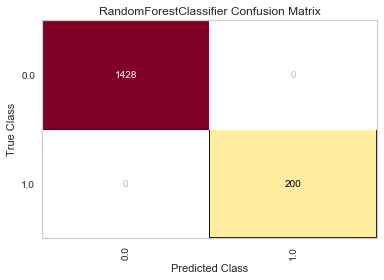

In [39]:
rf_model = RandomForestClassifier(random_state = 123, n_estimators = 500, criterion = 'entropy',max_leaf_nodes=1000, max_depth  = 15,  n_jobs=-1)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
y_pred_proba = rf_model.predict_proba(x_test)
y_pred_proba = [p[1] for p in y_pred_proba]
print(accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test,y_pred_rf))
viz = ConfusionMatrix(rf_model)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()
scores = cross_val_score(rf_model, X, Y, cv=10)
scores.sum()/10
main_data['rf_pred'] = rf_model.predict(X)

0.9262899262899262
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      1428
         1.0       0.98      0.41      0.58       200

    accuracy                           0.93      1628
   macro avg       0.95      0.70      0.77      1628
weighted avg       0.93      0.93      0.91      1628



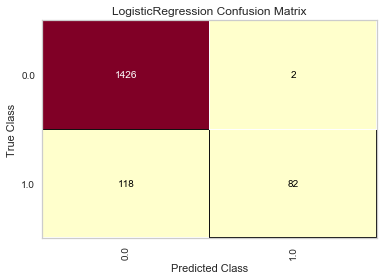

In [40]:
logmodel = LogisticRegression(random_state=123)
logmodel.fit(x_train, y_train)
y_pred = logmodel.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
viz = ConfusionMatrix(logmodel)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()
#scores = cross_val_score(logmodel, X, Y, cv=5)
#scores.sum()/5
main_data['log_pred'] =logmodel.predict(X)

In [41]:

main_data.to_csv('C:/Users/jayan/OneDrive/Documents/GitHub/Bankruptcy-Prediction/Data/data2.0.csv')
